In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned, model-ready dataset
df = pd.read_csv("../data/heart_disease_model_ready.csv")

# Separate features and target
X = df.drop(columns=['num'])   # or 'target' if you renamed earlier
y = df['num']
print("Shape:", X.shape)
X.head()

Shape: (303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238


In [2]:
# Apply PCA (keep all components first)
pca = PCA()
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)


Original shape: (303, 13)
Transformed shape: (303, 13)


In [3]:
# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cum_var = explained_var.cumsum()

print("Explained variance ratio per component:\n", explained_var)
print("Cumulative variance explained:\n", cum_var)


Explained variance ratio per component:
 [0.23687279 0.12307138 0.09531354 0.08434038 0.07583033 0.06793044
 0.06651688 0.059837   0.0528847  0.04334829 0.03526033 0.03157598
 0.02721797]
Cumulative variance explained:
 [0.23687279 0.35994417 0.45525771 0.53959809 0.61542842 0.68335886
 0.74987574 0.80971274 0.86259744 0.90594572 0.94120605 0.97278203
 1.        ]


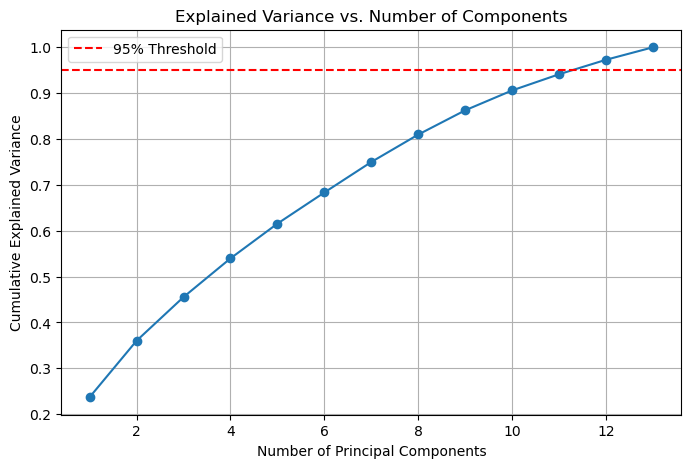

In [4]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Threshold")
plt.legend()
plt.grid(True)
plt.show()


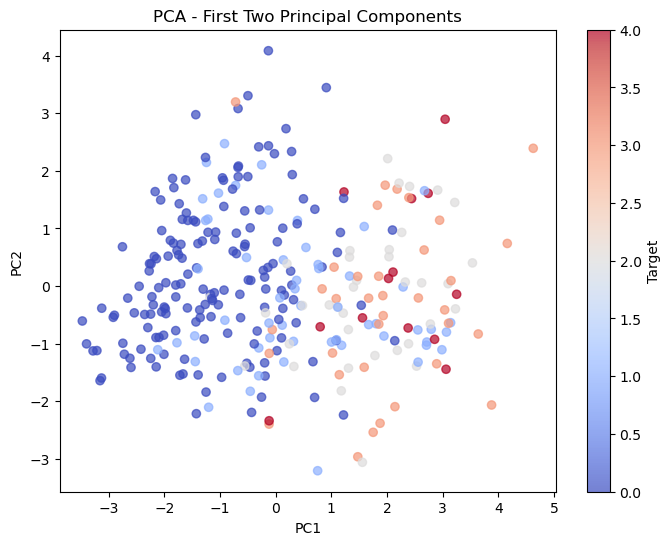

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Principal Components")
plt.colorbar(label="Target")
plt.show()


In [7]:
# Create PCA-transformed dataset (keeping all components)
pca_cols = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)
df_pca['target'] = y.values

# Save
df_pca.to_csv("../data/heart_disease_pca.csv", index=False)
print("Saved PCA-transformed dataset to ../data/heart_disease_pca.csv")


Saved PCA-transformed dataset to ../data/heart_disease_pca.csv
